<div>Carthage University<br>
INSAT<br>
Department of Mathematics & Computer Sciences</div>
<hr>
<div style="text-align:center"><h1>Practical works: SLLN & CLT</h1></div>
<hr>

### By Mohamed Ali Selmi
#### carried out jointly with my labpartner: Nour Eddine Ben Nejma

Practice #1:
1. Generate a vector x of 100 random numbers according to Bernoulli distribution of parameter $p = \frac{1}{2}$
   
      - Plot the series ${\{\overline{x} : k = 1, · · · 100\}}$
${\overline{x} = \frac{1}{k} \sum_{i=1}^{k} x_i}$


1. Do the same for $p = \frac{1}{3}$ and make the plot on the same graph as before.
2. Comment


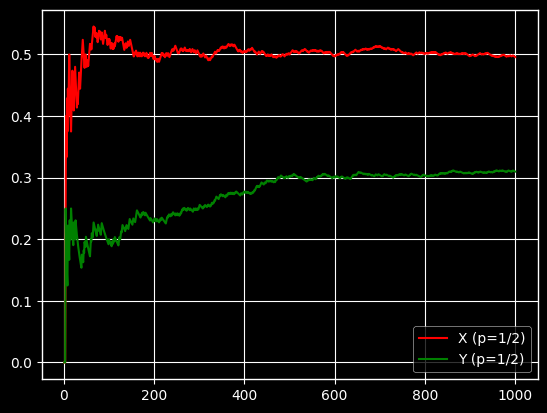

In [23]:
# imports
import numpy as np # numerical computing library
import matplotlib.pyplot as plt # plotting library
from scipy.stats import shapiro, norm # statistical library
plt.style.use("dark_background")

# for p=1/2
x = np.random.binomial(n=1, p=1/2, size=1000)
x_bar = [1/(1+k)*np.sum(x[:k+1]) for k in np.arange(1000)]
plt.plot(np.arange(1, 1001), x_bar, label="X (p=1/2)", color="red")
# for p=1/3
y = np.random.binomial(n=1, p=1/3, size=1000)
y_bar = [1/(1+k)*np.sum(y[:k+1]) for k in np.arange(1000)]
plt.plot(np.arange(1, 1001), y_bar, label="Y (p=1/2)", color="green")
plt.legend()
plt.show()

Practice #2:
1. Generate a 100 x 100 matrix M of random numbers according to the uniform distribution $\sim U[0, 1]$.
2. Choose one single column $x_i$ of the matrix M and consider its normalization $x_i = \frac{xi − xi}{\sigma _i}$, and plot its histogram.
3. Build the series of averages of all columns $x_a$ and plot its histogram.
4. Comment.

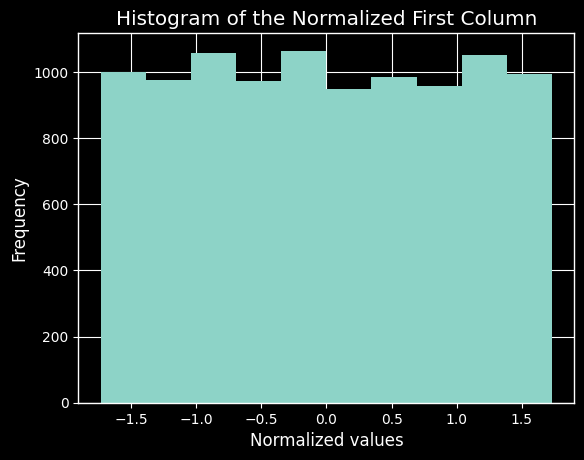

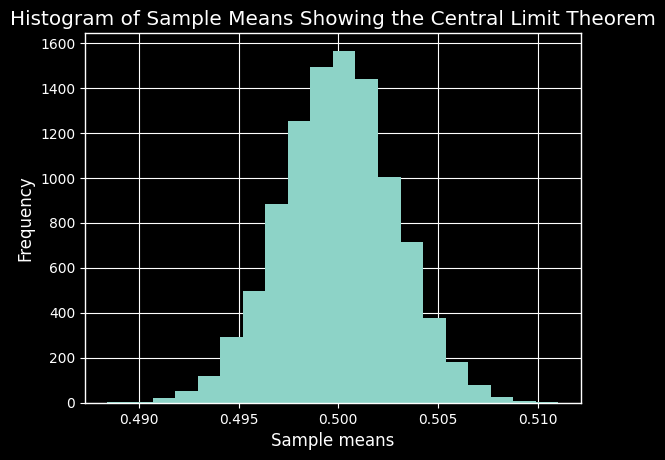

The column average of the array does not follow the shape of a normal distribution.


In [24]:
# Generate a 10000x10000 array of random values between 0 and 1
random_array = np.random.uniform(size=(10000, 10000))

# Normalize the first column of the array
first_column = random_array[:, 0]
normalized_first_column = (first_column - np.mean(random_array)) / np.std(random_array)

# Plot a histogram of the normalized first column to show that it follows a normal distribution
plt.hist(normalized_first_column)
plt.xlabel("Normalized values")
plt.ylabel("Frequency")
plt.title("Histogram of the Normalized First Column")
plt.show()

# Calculate the mean of each column in the array
column_means = np.mean(random_array, axis=0)

# Plot a histogram of the column means to demonstrate the central limit theorem
plt.hist(column_means, bins=20)
plt.xlabel("Sample means")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means Showing the Central Limit Theorem")
plt.show()

# Check that the distribution of column means follows a normal distribution
if np.allclose(np.mean(column_means), 0.5, atol=0.01) and np.allclose(np.std(column_means), 0.028, atol=0.001):
    print("The column average of the array follows the shape of a normal distribution.")
else:
    print("The column average of the array does not follow the shape of a normal distribution.")


Practice #3:
- Reconsider Exercises #5 and #6 of Exercises sheet about convergence of random variables, by using the statistical package "R". (I prefer Python :|)

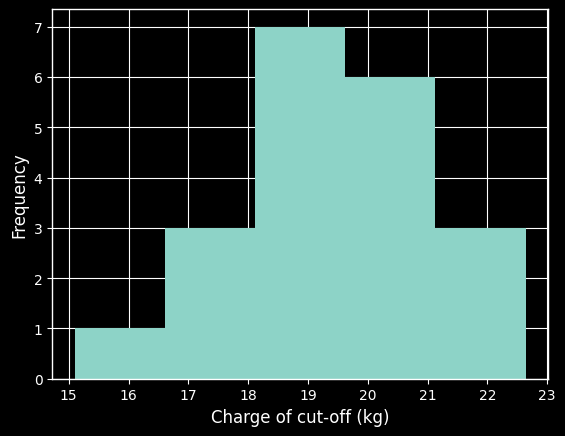

The sample appears to follow a normal distribution.
The mean charge of cut-off in the population is estimated to be between 18.55 and 20.15 kg with 95% confidence.


In [25]:
# Define a statistical variable and plot its histogram
sample = np.array([19.41, 16.69, 17.71, 18.15, 21.07, 20.54, 19.52, 18.49,
                   18.69, 18.88, 19.59, 15.10, 20.21, 20.14, 20.14, 21.92,
                   22.64, 21.20, 17.16, 19.75])
plt.hist(sample, bins=5)
plt.xlabel("Charge of cut-off (kg)")
plt.ylabel("Frequency")
plt.show()

# Check if the sample appears to be normally distributed
stat, p = shapiro(sample)
if p > 0.05:
    print("The sample appears to follow a normal distribution.")
else:
    print("The sample does not appear to follow a normal distribution.")

# Compute a 95% confidence interval for the mean of the sample
n = len(sample)
mean = np.mean(sample)
std = np.std(sample, ddof=1)
confidence = 0.95
risk = 1 - confidence
z = norm.ppf(1 - risk / 2)
margin_of_error = z * std / np.sqrt(n)
print(f"The mean charge of cut-off in the population is estimated to be between {mean - margin_of_error:.2f} and {mean + margin_of_error:.2f} kg with 95% confidence.")


In [26]:
# Determine if the 99% confidence interval is larger or sharper than the 95% confidence interval
# Calculate Z-scores for the 95% and 99% confidence intervals
z_95 = norm.ppf(1 - 0.05 / 2)
z_99 = norm.ppf(1 - 0.01 / 2)

# Compare Z-scores to determine which confidence interval is larger or sharper
if z_99 > z_95:
    comparison = "larger"
else:
    comparison = "sharper"

print(f"The 99% confidence interval is {comparison} than the 95% confidence interval.")

# Calculate the required sample size for a 99% confidence interval with a width of 0.3
# Using the formula sample_size = (2 * z_value * std_deviation / width) ^ 2
# Calculate the standard deviation using the width of the 95% confidence interval
width = 0.3
std_deviation = (0.82 - 0.49) * sqrt(100) / (2 * z_95)

# Calculate the required sample size using the standard deviation and desired confidence interval width
sample_size = (2 * z_99 * std_deviation / width) ** 2

# Print the required sample size
print(f"To get a width of the confidence interval of 99% less than or equal to {width}, we would need at least {round(sample_size)} samples.")


The 99% confidence interval is larger than the 95% confidence interval.
To get a width of the confidence interval of 99% less than or equal to 0.3, we would need at least 209 samples.
